In [1]:
import pandas as pd
import numpy as np
import re
pdf = pd.read_csv("OpenKontiLUQS_PM10_2010-2019.csv", sep =  ";", skiprows = 2)
np.random.seed(0)



In [2]:
pdf

,Datum,Zeit,AABU PM10F 24H gleitender Mittelwert [�g/m�],BIEL PM10F 24H gleitender Mittelwert [�g/m�],BONN PM10F 24H gleitender Mittelwert [�g/m�],BORG PM10F 24H gleitender Mittelwert [�g/m�],BOTT PM10F 24H gleitender Mittelwert [�g/m�],BUCH PM10F 24H gleitender Mittelwert [�g/m�],CHOR PM10F 24H gleitender Mittelwert [�g/m�],DATT PM10F 24H gleitender Mittelwert [�g/m�],...,VMS2 PM10F 24H gleitender Mittelwert [�g/m�],VOBM PM10F 24H gleitender Mittelwert [�g/m�],VREB PM10F 24H gleitender Mittelwert [�g/m�],VSCH PM10F 24H gleitender Mittelwert [�g/m�],VSGK PM10F 24H gleitender Mittelwert [�g/m�],VWEL PM10F 24H gleitender Mittelwert [�g/m�],WALS PM10F 24H gleitender Mittelwert [�g/m�],WAST PM10F 24H gleitender Mittelwert [�g/m�],WESE PM10F 24H gleitender Mittelwert [�g/m�],WULA PM10F 24H gleitender Mittelwert [�g/m�]
0,01.01.2010,01:00,25.0,27.0,41.0,26.0,37.0,42.0,50.0,36.0,...,29.0,NaN,54.0,NaN,NaN,42.0,30.0,19.0,26.0,29.0
1,01.01.2010,02:00,26.0,27.0,44.0,26.0,39.0,48.0,53.0,37.0,...,30.0,NaN,55.0,NaN,NaN,44.0,30.0,19.0,25.0,31.0
2,01.01.2010,03:00,27.0,26.0,46.0,24.0,39.0,49.0,55.0,37.0,...,30.0,NaN,56.0,NaN,NaN,46.0,29.0,19.0,24.0,33.0
3,01.01.2010,04:00,28.0,26.0,48.0,23.0,39.0,49.0,57.0,37.0,...,29.0,NaN,55.0,NaN,NaN,47.0,29.0,19.0,22.0,34.0
4,01.01.2010,05:00,29.0,24.0,49.0,22.0,39.0,49.0,59.0,36.0,...,28.0,NaN,55.0,NaN,NaN,48.0,29.0,19.0,21.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,15.0,26.0,25.0,30.0,25.0,22.0,35.0,32.0,...,35.0,40.0,NaN,NaN,35.0,26.0,31.0,19.0,20.0,18.0
87644,31.12.2019,21:00,15.0,27.0,24.0,30.0,26.0,24.0,37.0,35.0,...,36.0,41.0,NaN,NaN,34.0,26.0,33.0,19.0,21.0,20.0
87645,31.12.2019,22:00,16.0,29.0,25.0,30.0,27.0,25.0,39.0,39.0,...,37.0,41.0,NaN,NaN,34.0,27.0,37.0,20.0,21.0,23.0
87646,31.12.2019,23:00,16.0,30.0,25.0,30.0,28.0,26.0,41.0,42.0,...,39.0,42.0,NaN,NaN,34.0,29.0,38.0,20.0,21.0,25.0


In [3]:
pdf.columns

Index(['Datum', 'Zeit', 'AABU PM10F 24H gleitender Mittelwert [�g/m�]',
       'BIEL PM10F 24H gleitender Mittelwert [�g/m�]',
       'BONN PM10F 24H gleitender Mittelwert [�g/m�]',
       'BORG PM10F 24H gleitender Mittelwert [�g/m�]',
       'BOTT PM10F 24H gleitender Mittelwert [�g/m�]',
       'BUCH PM10F 24H gleitender Mittelwert [�g/m�]',
       'CHOR PM10F 24H gleitender Mittelwert [�g/m�]',
       'DATT PM10F 24H gleitender Mittelwert [�g/m�]',
       'DDCS PM10F 24H gleitender Mittelwert [�g/m�]',
       'DLOH PM10F 24H gleitender Mittelwert [�g/m�]',
       'DMD2 PM10F 24H gleitender Mittelwert [�g/m�]',
       'DUBR PM10F 24H gleitender Mittelwert [�g/m�]',
       'DUB2 PM10F 24H gleitender Mittelwert [�g/m�]',
       'DURH PM10F 24H gleitender Mittelwert [�g/m�]',
       'DWER PM10F 24H gleitender Mittelwert [�g/m�]',
       'EIFE PM10F 24H gleitender Mittelwert [�g/m�]',
       'ELSB PM10F 24H gleitender Mittelwert [�g/m�]',
       'EVOG PM10F 24H gleitender Mittelwert [�g

In [4]:
pdf.fillna(0 , inplace = True)

In [5]:
pdf

,Datum,Zeit,AABU PM10F 24H gleitender Mittelwert [�g/m�],BIEL PM10F 24H gleitender Mittelwert [�g/m�],BONN PM10F 24H gleitender Mittelwert [�g/m�],BORG PM10F 24H gleitender Mittelwert [�g/m�],BOTT PM10F 24H gleitender Mittelwert [�g/m�],BUCH PM10F 24H gleitender Mittelwert [�g/m�],CHOR PM10F 24H gleitender Mittelwert [�g/m�],DATT PM10F 24H gleitender Mittelwert [�g/m�],...,VMS2 PM10F 24H gleitender Mittelwert [�g/m�],VOBM PM10F 24H gleitender Mittelwert [�g/m�],VREB PM10F 24H gleitender Mittelwert [�g/m�],VSCH PM10F 24H gleitender Mittelwert [�g/m�],VSGK PM10F 24H gleitender Mittelwert [�g/m�],VWEL PM10F 24H gleitender Mittelwert [�g/m�],WALS PM10F 24H gleitender Mittelwert [�g/m�],WAST PM10F 24H gleitender Mittelwert [�g/m�],WESE PM10F 24H gleitender Mittelwert [�g/m�],WULA PM10F 24H gleitender Mittelwert [�g/m�]
0,01.01.2010,01:00,25.0,27.0,41.0,26.0,37.0,42.0,50.0,36.0,...,29.0,0.0,54.0,0.0,0.0,42.0,30.0,19.0,26.0,29.0
1,01.01.2010,02:00,26.0,27.0,44.0,26.0,39.0,48.0,53.0,37.0,...,30.0,0.0,55.0,0.0,0.0,44.0,30.0,19.0,25.0,31.0
2,01.01.2010,03:00,27.0,26.0,46.0,24.0,39.0,49.0,55.0,37.0,...,30.0,0.0,56.0,0.0,0.0,46.0,29.0,19.0,24.0,33.0
3,01.01.2010,04:00,28.0,26.0,48.0,23.0,39.0,49.0,57.0,37.0,...,29.0,0.0,55.0,0.0,0.0,47.0,29.0,19.0,22.0,34.0
4,01.01.2010,05:00,29.0,24.0,49.0,22.0,39.0,49.0,59.0,36.0,...,28.0,0.0,55.0,0.0,0.0,48.0,29.0,19.0,21.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,15.0,26.0,25.0,30.0,25.0,22.0,35.0,32.0,...,35.0,40.0,0.0,0.0,35.0,26.0,31.0,19.0,20.0,18.0
87644,31.12.2019,21:00,15.0,27.0,24.0,30.0,26.0,24.0,37.0,35.0,...,36.0,41.0,0.0,0.0,34.0,26.0,33.0,19.0,21.0,20.0
87645,31.12.2019,22:00,16.0,29.0,25.0,30.0,27.0,25.0,39.0,39.0,...,37.0,41.0,0.0,0.0,34.0,27.0,37.0,20.0,21.0,23.0
87646,31.12.2019,23:00,16.0,30.0,25.0,30.0,28.0,26.0,41.0,42.0,...,39.0,42.0,0.0,0.0,34.0,29.0,38.0,20.0,21.0,25.0


In [6]:
pdf_col = ['Datum',
'Zeit',
'Aachen1',
'Bielefeld1',
'Bonn',
'Borken',
'Bottrop1',
'Duisburg1',
'Cologne1',
'Datteln',
'Duesseldorf1',
'Duesseldorf2',
'Dortmund1',
'Duisburg2',
'Duisburg3',
'Duisburg4',
'Duesseldorf3',
'Simmerath',
'Elsdorf',
'Essen1',
'Grevenbroich',
'Hattingen',
'Huerth',
'Inden',
'Jackerath',
'Juechen',
'Krefeld1',
'Krefeld2',
'Krefeld3',
'Leverkusen1',
'Duesseldorf4',
'Moenchengladbach1',
'Muenster1',
'Neuss',
'Nettetal',
'Luenen',
'Niederzier',
'Ratingen',
'Recklinghausen',
'Cologne2',
'Netphen',
'Schwerte',
'Soest',
'Solingen1',
'Muelheim1',
'Aachen2',
'Bielefeld2',
'Bielefeld3',
'Bielefeld4',
'Bochum',
'Bottrop2',
'Dinslak',
'Dueren',
'Dortmund2',
'Dortmund3',
'Duesseldorf5',
'Duisburg5',
'Essen2',
'Essen3',
'Emmerich',
'Essen4',
'Gelsenkirchen',
'Gladbeck',
'Hagen',
'Herne',
'Iserlohn',
'Cologne3',
'Cologne4',
'Leverkusen2',
'Luedenscheid',
'Mettmann',
'Moenchengladbach2',
'Moenchengladbach3',
'Muelheim2',
'Muenster2',
'Oberhausen',
'Recklingh',
'Schwerte',
'Solingen2',
'Wuppertal1',
'Duisburg6',
'Warstein',
'Wesel',
'Wuppertal2']

In [7]:
pdf.columns = pdf_col

In [8]:
pdf

,Datum,Zeit,Aachen1,Bielefeld1,Bonn,Borken,Bottrop1,Duisburg1,Cologne1,Datteln,...,Muenster2,Oberhausen,Recklingh,Schwerte,Solingen2,Wuppertal1,Duisburg6,Warstein,Wesel,Wuppertal2
0,01.01.2010,01:00,25.0,27.0,41.0,26.0,37.0,42.0,50.0,36.0,...,29.0,0.0,54.0,0.0,0.0,42.0,30.0,19.0,26.0,29.0
1,01.01.2010,02:00,26.0,27.0,44.0,26.0,39.0,48.0,53.0,37.0,...,30.0,0.0,55.0,0.0,0.0,44.0,30.0,19.0,25.0,31.0
2,01.01.2010,03:00,27.0,26.0,46.0,24.0,39.0,49.0,55.0,37.0,...,30.0,0.0,56.0,0.0,0.0,46.0,29.0,19.0,24.0,33.0
3,01.01.2010,04:00,28.0,26.0,48.0,23.0,39.0,49.0,57.0,37.0,...,29.0,0.0,55.0,0.0,0.0,47.0,29.0,19.0,22.0,34.0
4,01.01.2010,05:00,29.0,24.0,49.0,22.0,39.0,49.0,59.0,36.0,...,28.0,0.0,55.0,0.0,0.0,48.0,29.0,19.0,21.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,15.0,26.0,25.0,30.0,25.0,22.0,35.0,32.0,...,35.0,40.0,0.0,0.0,35.0,26.0,31.0,19.0,20.0,18.0
87644,31.12.2019,21:00,15.0,27.0,24.0,30.0,26.0,24.0,37.0,35.0,...,36.0,41.0,0.0,0.0,34.0,26.0,33.0,19.0,21.0,20.0
87645,31.12.2019,22:00,16.0,29.0,25.0,30.0,27.0,25.0,39.0,39.0,...,37.0,41.0,0.0,0.0,34.0,27.0,37.0,20.0,21.0,23.0
87646,31.12.2019,23:00,16.0,30.0,25.0,30.0,28.0,26.0,41.0,42.0,...,39.0,42.0,0.0,0.0,34.0,29.0,38.0,20.0,21.0,25.0


In [9]:
pdf_sorted_col=['Datum',
'Zeit',
'Aachen1',
'Aachen2',
'Bielefeld1',
'Bielefeld2',
'Bielefeld3',
'Bielefeld4',
'Bonn',
'Borken',
'Bottrop1',
'Bottrop2',
'Duisburg1',
'Duisburg2',
'Duisburg3',
'Duisburg4',
'Duisburg5',
'Duisburg6',
'Cologne1',
'Cologne2',
'Cologne3',
'Cologne4',
'Datteln',
'Duesseldorf1',
'Duesseldorf2',
'Duesseldorf3',
'Duesseldorf4',
'Duesseldorf5',
'Dortmund1',
'Dortmund2',
'Dortmund3',
'Simmerath',
'Elsdorf',
'Essen1',
'Essen2',
'Essen3',
'Essen4',
'Grevenbroich',
'Hattingen',
'Huerth',
'Inden',
'Jackerath',
'Juechen',
'Krefeld1',
'Krefeld2',
'Krefeld3',
'Leverkusen1',
'Leverkusen2',
'Moenchengladbach1',
'Moenchengladbach2',
'Moenchengladbach3',
'Muenster1',
'Muenster2',
'Neuss',
'Nettetal',
'Luenen',
'Niederzier',
'Ratingen',
'Recklinghausen',
'Netphen',
'Schwerte',
'Soest',
'Solingen1',
'Solingen2',
'Muelheim1',
'Muelheim2',
'Bochum',
'Dinslak',
'Dueren',
'Emmerich',
'Gelsenkirchen',
'Gladbeck',
'Hagen',
'Herne',
'Iserlohn',
'Luedenscheid',
'Mettmann',
'Oberhausen',
'Recklingh',
'Schwerte',
'Wuppertal1',
'Wuppertal2',
'Warstein',
'Wesel']

In [10]:
pdf1 = pdf[pdf_sorted_col]

In [11]:
pdf1

,Datum,Zeit,Aachen1,Aachen2,Bielefeld1,Bielefeld2,Bielefeld3,Bielefeld4,Bonn,Borken,...,Luedenscheid,Mettmann,Oberhausen,Recklingh,Schwerte,Schwerte,Wuppertal1,Wuppertal2,Warstein,Wesel
0,01.01.2010,01:00,25.0,45.0,27.0,0.0,0.0,34.0,41.0,26.0,...,0.0,40.0,0.0,54.0,24.0,0.0,42.0,29.0,19.0,26.0
1,01.01.2010,02:00,26.0,49.0,27.0,0.0,0.0,36.0,44.0,26.0,...,0.0,42.0,0.0,55.0,23.0,0.0,44.0,31.0,19.0,25.0
2,01.01.2010,03:00,27.0,50.0,26.0,0.0,0.0,36.0,46.0,24.0,...,0.0,45.0,0.0,56.0,23.0,0.0,46.0,33.0,19.0,24.0
3,01.01.2010,04:00,28.0,51.0,26.0,0.0,0.0,35.0,48.0,23.0,...,0.0,46.0,0.0,55.0,23.0,0.0,47.0,34.0,19.0,22.0
4,01.01.2010,05:00,29.0,52.0,24.0,0.0,0.0,34.0,49.0,22.0,...,0.0,46.0,0.0,55.0,22.0,0.0,48.0,35.0,19.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,15.0,33.0,26.0,27.0,32.0,0.0,25.0,30.0,...,0.0,0.0,40.0,0.0,21.0,0.0,26.0,18.0,19.0,20.0
87644,31.12.2019,21:00,15.0,35.0,27.0,28.0,34.0,0.0,24.0,30.0,...,0.0,0.0,41.0,0.0,21.0,0.0,26.0,20.0,19.0,21.0
87645,31.12.2019,22:00,16.0,36.0,29.0,30.0,35.0,0.0,25.0,30.0,...,0.0,0.0,41.0,0.0,22.0,0.0,27.0,23.0,20.0,21.0
87646,31.12.2019,23:00,16.0,37.0,30.0,31.0,37.0,0.0,25.0,30.0,...,0.0,0.0,42.0,0.0,23.0,0.0,29.0,25.0,20.0,21.0


In [12]:
pdf1.columns

Index(['Datum', 'Zeit', 'Aachen1', 'Aachen2', 'Bielefeld1', 'Bielefeld2',
       'Bielefeld3', 'Bielefeld4', 'Bonn', 'Borken', 'Bottrop1', 'Bottrop2',
       'Duisburg1', 'Duisburg2', 'Duisburg3', 'Duisburg4', 'Duisburg5',
       'Duisburg6', 'Cologne1', 'Cologne2', 'Cologne3', 'Cologne4', 'Datteln',
       'Duesseldorf1', 'Duesseldorf2', 'Duesseldorf3', 'Duesseldorf4',
       'Duesseldorf5', 'Dortmund1', 'Dortmund2', 'Dortmund3', 'Simmerath',
       'Elsdorf', 'Essen1', 'Essen2', 'Essen3', 'Essen4', 'Grevenbroich',
       'Hattingen', 'Huerth', 'Inden', 'Jackerath', 'Juechen', 'Krefeld1',
       'Krefeld2', 'Krefeld3', 'Leverkusen1', 'Leverkusen2',
       'Moenchengladbach1', 'Moenchengladbach2', 'Moenchengladbach3',
       'Muenster1', 'Muenster2', 'Neuss', 'Nettetal', 'Luenen', 'Niederzier',
       'Ratingen', 'Recklinghausen', 'Netphen', 'Schwerte', 'Schwerte',
       'Soest', 'Solingen1', 'Solingen2', 'Muelheim1', 'Muelheim2', 'Bochum',
       'Dinslak', 'Dueren', 'Emmerich', 'Gel

In [13]:
pdf1['Aachen'] = pdf1.loc[: , "Aachen1": "Aachen2"].mean(axis = 1)
pdf1['Bielefeld'] = pdf1.loc[: , "Bielefeld1":"Bielefeld4"].mean(axis = 1)
pdf1['Bottrop'] = pdf1.loc[:,"Bottrop1":"Bottrop2"].mean(axis = 1)
pdf1['Duisburg'] = pdf1.loc[: , "Duisburg1":"Duisburg6"].mean(axis = 1)
pdf1['Cologne'] = pdf1.loc[: , "Cologne1":"Cologne4"].mean(axis = 1)
pdf1['Duesseldorf'] = pdf1.loc[: , "Duesseldorf1":"Duesseldorf5"].mean(axis = 1)
pdf1['Dortmund'] = pdf1.loc[: , "Dortmund1":"Dortmund3"].mean(axis = 1)
pdf1['Essen'] = pdf1.loc[: , "Essen1":"Essen4"].mean(axis = 1)
pdf1['Krefeld'] = pdf1.loc[: , "Krefeld1":"Krefeld3"].mean(axis = 1)
pdf1['Leverkusen'] = pdf1.loc[: , "Leverkusen1":"Leverkusen2"].mean(axis = 1)
pdf1['Moenchengladbach'] = pdf1.loc[: , "Moenchengladbach1":"Moenchengladbach3"].mean(axis = 1)
pdf1['Muenster'] = pdf1.loc[: , "Muenster1":"Muenster2"].mean(axis = 1)
pdf1['Solingen'] = pdf1.loc[: , "Solingen1":"Solingen2"].mean(axis = 1)
pdf1['Muelheim'] = pdf1.loc[: , "Muelheim1":"Muelheim2"].mean(axis = 1)
pdf1['Wuppertal'] = pdf1.loc[: , "Wuppertal1":"Wuppertal2"].mean(axis = 1)








<ipython-input-13-64d503b0f8e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf1['Aachen'] = pdf1.loc[: , "Aachen1": "Aachen2"].mean(axis = 1)
<ipython-input-13-64d503b0f8e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf1['Bielefeld'] = pdf1.loc[: , "Bielefeld1":"Bielefeld4"].mean(axis = 1)
<ipython-input-13-64d503b0f8e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [14]:
pdf1

,Datum,Zeit,Aachen1,Aachen2,Bielefeld1,Bielefeld2,Bielefeld3,Bielefeld4,Bonn,Borken,...,Duesseldorf,Dortmund,Essen,Krefeld,Leverkusen,Moenchengladbach,Muenster,Solingen,Muelheim,Wuppertal
0,01.01.2010,01:00,25.0,45.0,27.0,0.0,0.0,34.0,41.0,26.0,...,16.2,63.333333,37.50,32.666667,15.5,49.000000,28.0,11.0,15.0,35.5
1,01.01.2010,02:00,26.0,49.0,27.0,0.0,0.0,36.0,44.0,26.0,...,17.8,65.000000,40.50,35.666667,19.5,52.000000,28.5,11.5,15.5,37.5
2,01.01.2010,03:00,27.0,50.0,26.0,0.0,0.0,36.0,46.0,24.0,...,19.2,65.333333,40.50,36.000000,21.0,54.000000,28.5,12.0,15.5,39.5
3,01.01.2010,04:00,28.0,51.0,26.0,0.0,0.0,35.0,48.0,23.0,...,19.6,65.333333,40.50,36.000000,21.5,54.333333,27.5,12.5,15.5,40.5
4,01.01.2010,05:00,29.0,52.0,24.0,0.0,0.0,34.0,49.0,22.0,...,19.8,65.666667,40.50,36.666667,22.5,55.000000,26.5,12.5,15.5,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,15.0,33.0,26.0,27.0,32.0,0.0,25.0,30.0,...,16.6,26.666667,13.50,8.000000,9.5,11.666667,31.5,27.0,14.5,22.0
87644,31.12.2019,21:00,15.0,35.0,27.0,28.0,34.0,0.0,24.0,30.0,...,17.0,27.000000,14.50,8.000000,10.0,12.000000,32.0,26.5,15.5,23.0
87645,31.12.2019,22:00,16.0,36.0,29.0,30.0,35.0,0.0,25.0,30.0,...,17.8,28.000000,15.50,8.000000,11.0,15.000000,33.0,26.5,16.0,25.0
87646,31.12.2019,23:00,16.0,37.0,30.0,31.0,37.0,0.0,25.0,30.0,...,18.4,28.333333,16.50,8.333333,11.0,16.000000,34.5,27.0,17.0,27.0


In [15]:
pdf1.columns

Index(['Datum', 'Zeit', 'Aachen1', 'Aachen2', 'Bielefeld1', 'Bielefeld2',
       'Bielefeld3', 'Bielefeld4', 'Bonn', 'Borken',
       ...
       'Duesseldorf', 'Dortmund', 'Essen', 'Krefeld', 'Leverkusen',
       'Moenchengladbach', 'Muenster', 'Solingen', 'Muelheim', 'Wuppertal'],
      dtype='object', length=101)

In [16]:
pdf1.drop(['Zeit',
'Aachen1',
'Aachen2',
'Bielefeld1',
'Bielefeld2',
'Bielefeld3',
'Bielefeld4',
'Bottrop1',
'Bottrop2',
'Duisburg1',
'Duisburg2',
'Duisburg3',
'Duisburg4',
'Duisburg5',
'Duisburg6',
'Cologne1',
'Cologne2',
'Cologne3',
'Cologne4',
'Duesseldorf1',
'Duesseldorf2',
'Duesseldorf3',
'Duesseldorf4',
'Duesseldorf5',
'Dortmund1',
'Dortmund2',
'Dortmund3',
'Essen1',
'Essen2',
'Essen3',
'Essen4',
'Krefeld1',
'Krefeld2',
'Krefeld3',
'Leverkusen1',
'Leverkusen2',
'Moenchengladbach1',
'Moenchengladbach2',
'Moenchengladbach3',
'Muenster1',
'Muenster2',
'Solingen1',
'Solingen2',
'Muelheim1',
'Muelheim2',
'Wuppertal1',
'Wuppertal2'], axis = 1, inplace = True) 

C:\Users\anuph\anaconda3\envs\geo\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
pdf1

,Datum,Bonn,Borken,Datteln,Simmerath,Elsdorf,Grevenbroich,Hattingen,Huerth,Inden,...,Duesseldorf,Dortmund,Essen,Krefeld,Leverkusen,Moenchengladbach,Muenster,Solingen,Muelheim,Wuppertal
0,01.01.2010,41.0,26.0,36.0,10.0,0.0,33.0,0.0,43.0,31.0,...,16.2,63.333333,37.50,32.666667,15.5,49.000000,28.0,11.0,15.0,35.5
1,01.01.2010,44.0,26.0,37.0,10.0,0.0,35.0,0.0,44.0,31.0,...,17.8,65.000000,40.50,35.666667,19.5,52.000000,28.5,11.5,15.5,37.5
2,01.01.2010,46.0,24.0,37.0,10.0,0.0,38.0,0.0,47.0,32.0,...,19.2,65.333333,40.50,36.000000,21.0,54.000000,28.5,12.0,15.5,39.5
3,01.01.2010,48.0,23.0,37.0,10.0,0.0,41.0,0.0,49.0,33.0,...,19.6,65.333333,40.50,36.000000,21.5,54.333333,27.5,12.5,15.5,40.5
4,01.01.2010,49.0,22.0,36.0,10.0,0.0,41.0,0.0,52.0,34.0,...,19.8,65.666667,40.50,36.666667,22.5,55.000000,26.5,12.5,15.5,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,25.0,30.0,32.0,10.0,39.0,0.0,19.0,26.0,0.0,...,16.6,26.666667,13.50,8.000000,9.5,11.666667,31.5,27.0,14.5,22.0
87644,31.12.2019,24.0,30.0,35.0,10.0,40.0,0.0,20.0,28.0,0.0,...,17.0,27.000000,14.50,8.000000,10.0,12.000000,32.0,26.5,15.5,23.0
87645,31.12.2019,25.0,30.0,39.0,10.0,41.0,0.0,20.0,28.0,0.0,...,17.8,28.000000,15.50,8.000000,11.0,15.000000,33.0,26.5,16.0,25.0
87646,31.12.2019,25.0,30.0,42.0,10.0,41.0,0.0,20.0,29.0,0.0,...,18.4,28.333333,16.50,8.333333,11.0,16.000000,34.5,27.0,17.0,27.0


In [18]:
pdf1['Datum'] = pd.to_datetime(pdf1.Datum)

<ipython-input-18-5c0b4a9f8ec4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf1['Datum'] = pd.to_datetime(pdf1.Datum)


In [19]:
pdf1.dtypes

Datum               datetime64[ns]
Bonn                       float64
Borken                     float64
Datteln                    float64
Simmerath                  float64
Elsdorf                    float64
Grevenbroich               float64
Hattingen                  float64
Huerth                     float64
Inden                      float64
Jackerath                  float64
Juechen                    float64
Neuss                      float64
Nettetal                   float64
Luenen                     float64
Niederzier                 float64
Ratingen                   float64
Recklinghausen             float64
Netphen                    float64
Schwerte                   float64
Schwerte                   float64
Soest                      float64
Bochum                     float64
Dinslak                    float64
Dueren                     float64
Emmerich                   float64
Gelsenkirchen              float64
Gladbeck                   float64
Hagen               

In [20]:
pdf1['Year'] = pdf1.Datum.dt.year

<ipython-input-20-67f65c472f16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf1['Year'] = pdf1.Datum.dt.year


In [21]:
pdf1

,Datum,Bonn,Borken,Datteln,Simmerath,Elsdorf,Grevenbroich,Hattingen,Huerth,Inden,...,Dortmund,Essen,Krefeld,Leverkusen,Moenchengladbach,Muenster,Solingen,Muelheim,Wuppertal,Year
0,2010-01-01,41.0,26.0,36.0,10.0,0.0,33.0,0.0,43.0,31.0,...,63.333333,37.50,32.666667,15.5,49.000000,28.0,11.0,15.0,35.5,2010
1,2010-01-01,44.0,26.0,37.0,10.0,0.0,35.0,0.0,44.0,31.0,...,65.000000,40.50,35.666667,19.5,52.000000,28.5,11.5,15.5,37.5,2010
2,2010-01-01,46.0,24.0,37.0,10.0,0.0,38.0,0.0,47.0,32.0,...,65.333333,40.50,36.000000,21.0,54.000000,28.5,12.0,15.5,39.5,2010
3,2010-01-01,48.0,23.0,37.0,10.0,0.0,41.0,0.0,49.0,33.0,...,65.333333,40.50,36.000000,21.5,54.333333,27.5,12.5,15.5,40.5,2010
4,2010-01-01,49.0,22.0,36.0,10.0,0.0,41.0,0.0,52.0,34.0,...,65.666667,40.50,36.666667,22.5,55.000000,26.5,12.5,15.5,41.5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2019-12-31,25.0,30.0,32.0,10.0,39.0,0.0,19.0,26.0,0.0,...,26.666667,13.50,8.000000,9.5,11.666667,31.5,27.0,14.5,22.0,2019
87644,2019-12-31,24.0,30.0,35.0,10.0,40.0,0.0,20.0,28.0,0.0,...,27.000000,14.50,8.000000,10.0,12.000000,32.0,26.5,15.5,23.0,2019
87645,2019-12-31,25.0,30.0,39.0,10.0,41.0,0.0,20.0,28.0,0.0,...,28.000000,15.50,8.000000,11.0,15.000000,33.0,26.5,16.0,25.0,2019
87646,2019-12-31,25.0,30.0,42.0,10.0,41.0,0.0,20.0,29.0,0.0,...,28.333333,16.50,8.333333,11.0,16.000000,34.5,27.0,17.0,27.0,2019


In [22]:
pdf1.drop(['Datum'],axis = 1, inplace = True)

C:\Users\anuph\anaconda3\envs\geo\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
pdf1

,Bonn,Borken,Datteln,Simmerath,Elsdorf,Grevenbroich,Hattingen,Huerth,Inden,Jackerath,...,Dortmund,Essen,Krefeld,Leverkusen,Moenchengladbach,Muenster,Solingen,Muelheim,Wuppertal,Year
0,41.0,26.0,36.0,10.0,0.0,33.0,0.0,43.0,31.0,0.0,...,63.333333,37.50,32.666667,15.5,49.000000,28.0,11.0,15.0,35.5,2010
1,44.0,26.0,37.0,10.0,0.0,35.0,0.0,44.0,31.0,0.0,...,65.000000,40.50,35.666667,19.5,52.000000,28.5,11.5,15.5,37.5,2010
2,46.0,24.0,37.0,10.0,0.0,38.0,0.0,47.0,32.0,0.0,...,65.333333,40.50,36.000000,21.0,54.000000,28.5,12.0,15.5,39.5,2010
3,48.0,23.0,37.0,10.0,0.0,41.0,0.0,49.0,33.0,0.0,...,65.333333,40.50,36.000000,21.5,54.333333,27.5,12.5,15.5,40.5,2010
4,49.0,22.0,36.0,10.0,0.0,41.0,0.0,52.0,34.0,0.0,...,65.666667,40.50,36.666667,22.5,55.000000,26.5,12.5,15.5,41.5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,25.0,30.0,32.0,10.0,39.0,0.0,19.0,26.0,0.0,33.0,...,26.666667,13.50,8.000000,9.5,11.666667,31.5,27.0,14.5,22.0,2019
87644,24.0,30.0,35.0,10.0,40.0,0.0,20.0,28.0,0.0,34.0,...,27.000000,14.50,8.000000,10.0,12.000000,32.0,26.5,15.5,23.0,2019
87645,25.0,30.0,39.0,10.0,41.0,0.0,20.0,28.0,0.0,35.0,...,28.000000,15.50,8.000000,11.0,15.000000,33.0,26.5,16.0,25.0,2019
87646,25.0,30.0,42.0,10.0,41.0,0.0,20.0,29.0,0.0,38.0,...,28.333333,16.50,8.333333,11.0,16.000000,34.5,27.0,17.0,27.0,2019


<AxesSubplot:>

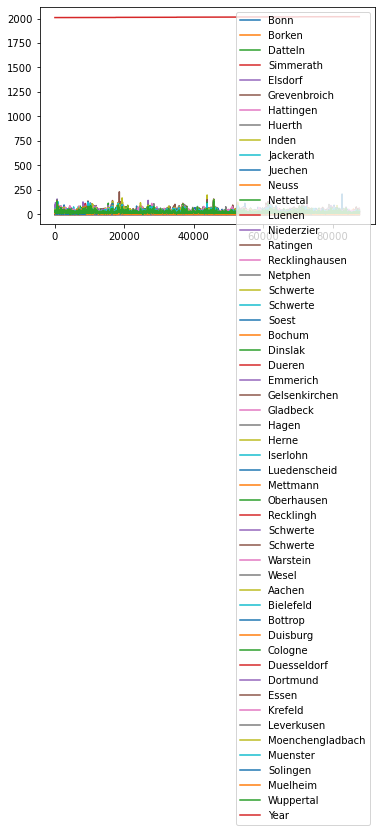

In [24]:
pdf1.plot()

In [25]:
pdf1[pdf1.Year == 2010 ].mean()

Bonn                  25.258105
Borken                23.810616
Datteln               24.734817
Simmerath             14.002626
Elsdorf                0.000000
Grevenbroich          26.273402
Hattingen             20.244521
Huerth                25.761187
Inden                  1.264954
Jackerath              0.000000
Juechen                0.000000
Neuss                  0.000000
Nettetal              22.738014
Luenen                23.202397
Niederzier            28.081507
Ratingen              21.381735
Recklinghausen         0.000000
Netphen               14.159932
Schwerte              22.267352
Schwerte               0.000000
Soest                 20.029452
Bochum                 0.000000
Dinslak               26.315297
Dueren                 0.410160
Emmerich              28.978539
Gelsenkirchen          0.000000
Gladbeck               0.000000
Hagen                 31.047374
Herne                  0.000000
Iserlohn              26.670434
Luedenscheid           0.000000
Mettmann

In [36]:
pdf1.to_csv('PM10_beta.csv')

In [50]:
pdf2 = pdf1.groupby("Year").mean()

In [51]:
pdf2.columns

Index(['Bonn', 'Borken', 'Datteln', 'Simmerath', 'Elsdorf', 'Grevenbroich',
       'Hattingen', 'Huerth', 'Inden', 'Jackerath', 'Juechen', 'Neuss',
       'Nettetal', 'Luenen', 'Niederzier', 'Ratingen', 'Recklinghausen',
       'Netphen', 'Schwerte', 'Schwerte', 'Soest', 'Bochum', 'Dinslak',
       'Dueren', 'Emmerich', 'Gelsenkirchen', 'Gladbeck', 'Hagen', 'Herne',
       'Iserlohn', 'Luedenscheid', 'Mettmann', 'Oberhausen', 'Recklingh',
       'Schwerte', 'Schwerte', 'Warstein', 'Wesel', 'Aachen', 'Bielefeld',
       'Bottrop', 'Duisburg', 'Cologne', 'Duesseldorf', 'Dortmund', 'Essen',
       'Krefeld', 'Leverkusen', 'Moenchengladbach', 'Muenster', 'Solingen',
       'Muelheim', 'Wuppertal'],
      dtype='object')

In [52]:
pdf3= pdf2.drop(['Borken', 'Datteln', 'Simmerath', 'Elsdorf', 'Grevenbroich',
       'Hattingen', 'Huerth', 'Inden', 'Jackerath', 'Juechen', 'Neuss',
       'Nettetal', 'Luenen', 'Niederzier', 'Ratingen', 'Recklinghausen',
       'Netphen', 'Schwerte', 'Schwerte', 'Soest','Bochum', 'Dinslak',
       'Dueren', 'Emmerich', 'Gelsenkirchen', 'Gladbeck', 'Herne',
       'Iserlohn', 'Luedenscheid', 'Mettmann', 'Oberhausen', 'Recklingh',
       'Schwerte', 'Schwerte', 'Warstein', 'Wesel',
       'Bottrop', 'Leverkusen', 'Wuppertal'], axis = 1, inplace = True) 

In [53]:
pdf2

,Bonn,Hagen,Aachen,Bielefeld,Duisburg,Cologne,Duesseldorf,Dortmund,Essen,Krefeld,Moenchengladbach,Muenster,Solingen,Muelheim
Year,,,,,,,,,,,,,,
2010,25.258105,31.047374,25.329053,11.763385,18.384570,24.615696,11.680114,28.036377,27.698031,16.962215,15.909209,25.360388,10.652797,26.952340
2011,22.680137,31.605251,24.482591,12.620320,18.251903,24.093779,11.038447,28.668227,21.463699,18.462100,25.838470,25.550342,10.053082,12.941153
2012,20.375342,28.735656,22.521061,10.840392,16.061817,23.344974,9.900478,24.836635,18.961151,15.546486,22.597602,22.562215,9.611054,10.762181
2013,20.496689,32.007877,25.146804,11.012100,17.063337,24.035217,14.392100,25.759741,18.917352,14.379680,22.866058,23.695263,10.120833,11.295662
2014,20.029224,29.377511,21.110103,11.234218,15.726370,22.199600,12.953151,22.910731,17.443750,5.564231,20.225419,21.977454,8.956678,10.169349
2015,20.160616,26.562671,19.956393,10.734418,14.425133,21.761416,13.211689,21.928082,16.687015,5.712709,20.016248,20.297317,8.574886,9.332021
2016,18.317281,25.144353,18.342555,10.278005,13.460629,20.065745,8.210974,21.044740,15.772029,5.624696,19.637940,19.590904,8.022370,9.698201
2017,17.923174,26.247260,18.230537,10.524543,14.766058,20.555422,8.425662,21.677017,16.229053,5.065449,19.785693,20.114783,18.879909,10.198231
2018,19.587100,27.066210,18.535731,16.799172,17.712348,20.751113,8.386119,20.791553,16.482648,5.060845,20.528120,22.138071,19.088699,10.761986


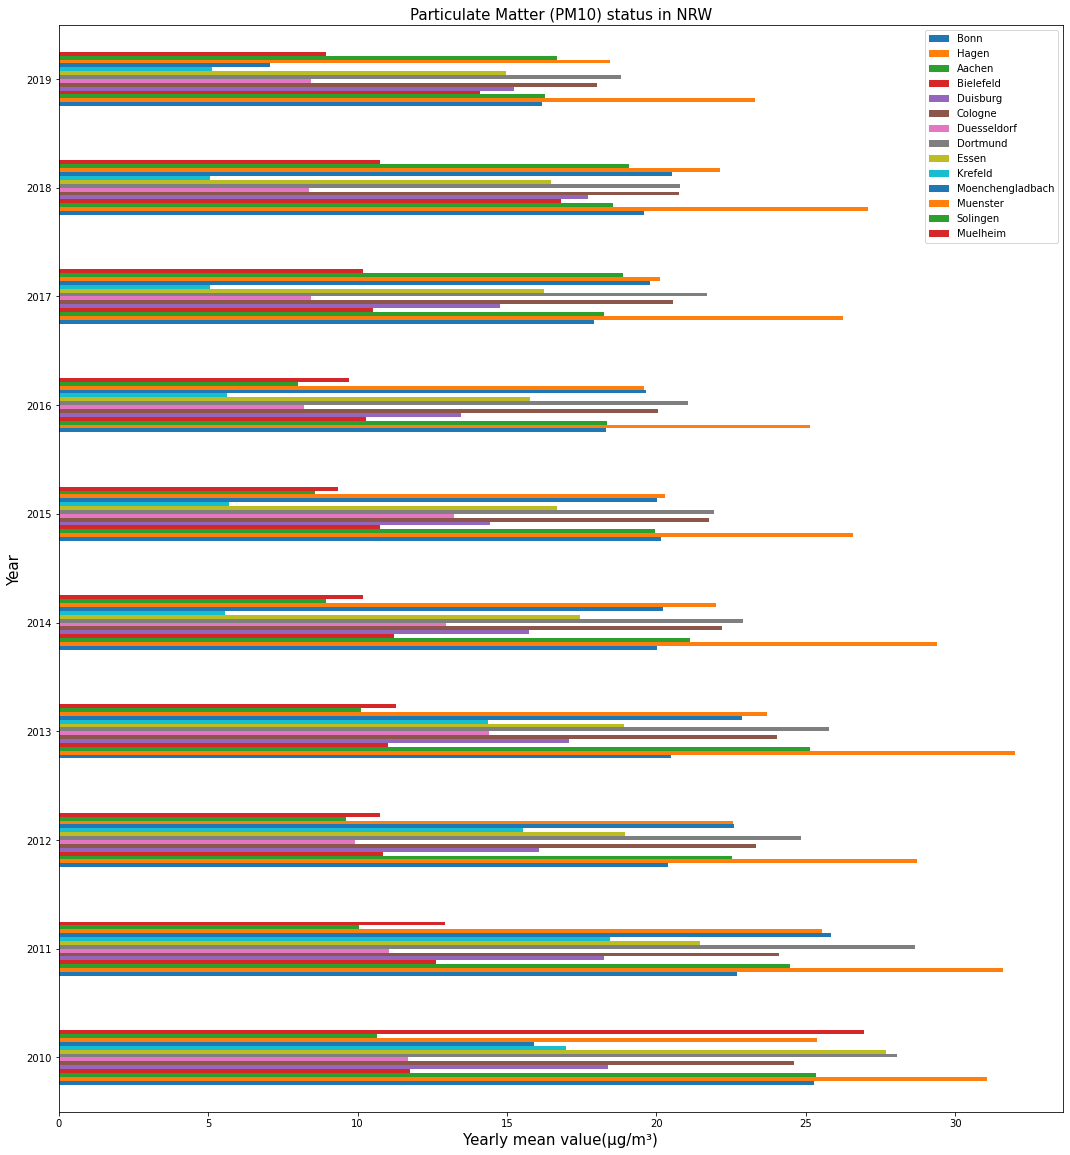

In [54]:
ax = pdf2.plot(kind = "barh",figsize=(18,20), fontsize=10)
ax.set_xlabel("Yearly mean value(µg/m³)",fontsize=15)
ax.set_ylabel("Year",fontsize=15)
ax.set_title("Particulate Matter (PM10) status in NRW",fontsize=15)
fig = ax.get_figure()   
fig.savefig('PM10.png')